In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_profiling as pp
import seaborn as sns

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, classification_report
from sklearn.pipeline import make_pipeline

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

from textblob import TextBlob
import spacy
from spacy import displacy

/Users/brianlouie/anaconda3/lib/python3.6/site-packages/pandas_profiling/plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/Users/brianlouie/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/brianlouie/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/brianlouie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/brianlouie/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/brianlouie/anaconda3/lib/python3.6/site-packages/ipykernel/k

In [2]:
wine = pd.read_csv('winemag-data-130k-v2.csv.zip')

In [3]:
wine.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [4]:
wine.shape

(129971, 14)

In [5]:
wine = pd.read_csv('winemag-data-130k-v2.csv.zip', index_col=0)

#removed index column from the csv file

In [6]:
wine.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [7]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129971 entries, 0 to 129970
Data columns (total 13 columns):
country                  129908 non-null object
description              129971 non-null object
designation              92506 non-null object
points                   129971 non-null int64
price                    120975 non-null float64
province                 129908 non-null object
region_1                 108724 non-null object
region_2                 50511 non-null object
taster_name              103727 non-null object
taster_twitter_handle    98758 non-null object
title                    129971 non-null object
variety                  129970 non-null object
winery                   129971 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 13.9+ MB


In [8]:
wine.isnull().sum()

country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

In [9]:
wine_province = wine.province.unique()

In [10]:
len(wine_province)

426

In [11]:
wine['province'].value_counts()

California                   36247
Washington                    8639
Bordeaux                      5941
Tuscany                       5897
Oregon                        5373
Burgundy                      3980
Northern Spain                3851
Piedmont                      3729
Mendoza Province              3264
Veneto                        2716
New York                      2688
Alsace                        2440
Northeastern Italy            2138
Loire Valley                  1856
Sicily & Sardinia             1797
Champagne                     1613
Southwest France              1503
South Australia               1349
Southern Italy                1349
Provence                      1346
Douro                         1281
Central Italy                 1233
Catalonia                     1164
Rhône Valley                  1081
Beaujolais                    1044
Mosel                         1039
Alentejano                     937
Colchagua Valley               830
Marlborough         

In [12]:
wine['country'].value_counts()

#US is the biggest wine producer on this list

US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14
Serbia  

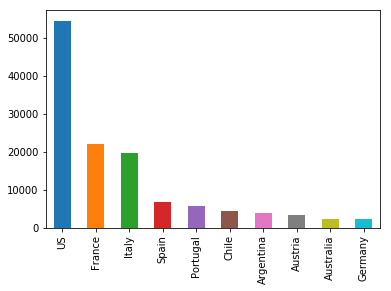

In [13]:
wine['country'].value_counts()[:10].plot(kind='bar')

#largest 10 wine producers in this dataset

In [14]:
wine.variety.value_counts()

Pinot Noir                        13272
Chardonnay                        11753
Cabernet Sauvignon                 9472
Red Blend                          8946
Bordeaux-style Red Blend           6915
Riesling                           5189
Sauvignon Blanc                    4967
Syrah                              4142
Rosé                               3564
Merlot                             3102
Nebbiolo                           2804
Zinfandel                          2714
Sangiovese                         2707
Malbec                             2652
Portuguese Red                     2466
White Blend                        2360
Sparkling Blend                    2153
Tempranillo                        1810
Rhône-style Red Blend              1471
Pinot Gris                         1455
Champagne Blend                    1396
Cabernet Franc                     1353
Grüner Veltliner                   1345
Portuguese White                   1159
Bordeaux-style White Blend         1066


In [15]:
wine_variety = wine.variety.unique()
len(wine_variety)

#708 unique wine types 

708

In [16]:
list(wine_variety[6:13])

['Frappato',
 'Gewürztraminer',
 'Cabernet Sauvignon',
 'Nerello Mascalese',
 'Chardonnay',
 'Malbec',
 'Tempranillo Blend']

/Users/brianlouie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


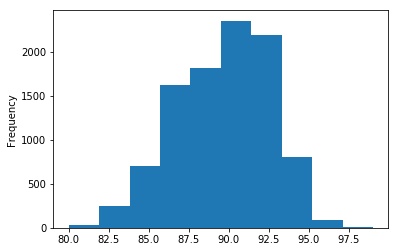

In [17]:
US_pinotnoir = wine[wine['country'] == 'US'][wine['variety']== 'Pinot Noir']
US_pinotnoir['points'].plot(kind='hist')

/Users/brianlouie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


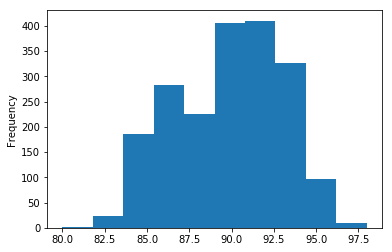

In [18]:
Fra_pinotnoir = wine[wine['country'] == 'France'][wine['variety']== 'Pinot Noir']
Fra_pinotnoir['points'].plot(kind='hist')

In [19]:
ita_pinotnoir = wine[wine['country'] == 'Italy'][wine['variety']== 'Pinot Noir']
esp_pinotnoir = wine[wine['country'] == 'Spain'][wine['variety']== 'Pinot Noir']

/Users/brianlouie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/Users/brianlouie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Text(0.5,1,'France Pinot Noir Wine Mag rankings')

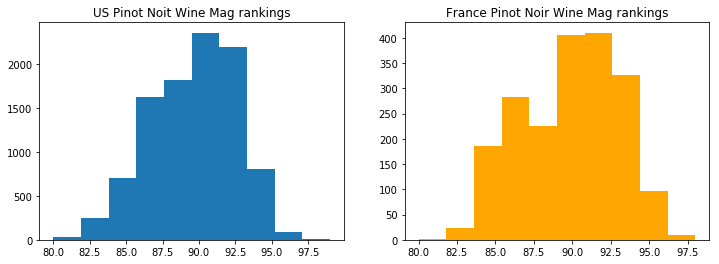

In [20]:
plt.figure(figsize = (12, 4))

plt.subplot(1,2,1)
plt.hist(US_pinotnoir['points'])
plt.title('US Pinot Noit Wine Mag rankings')

plt.subplot(1,2,2)
plt.hist(Fra_pinotnoir['points'], color = 'orange')
plt.title('France Pinot Noir Wine Mag rankings')


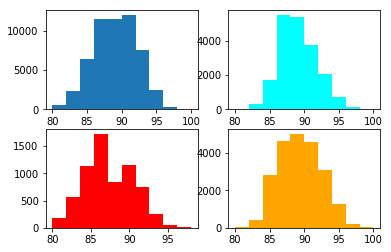

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=2)


plt.subplot(2,2,1)
us_rating = wine[wine['country']== 'US']['points']
plt.hist(us_rating)

plt.subplot(2,2,2)
ita_rating = wine[wine['country']== 'Italy']['points']
plt.hist(ita_rating, color='aqua')

plt.subplot(2,2,3)
esp_rating = wine[wine['country']== 'Spain']['points']
plt.hist(esp_rating, color='red')

plt.subplot(2,2,4)
fra_rating = wine[wine['country']== 'France']['points']
plt.hist(fra_rating, color='orange')

plt.show()

In [22]:
wine.points.mean()

#Average rating of a bottle of wine on the list is 88

88.44713820775404

In [124]:
wine.points.min()

#lowest rated bottle is an 80

80

In [125]:
wine.points.describe()

count    129971.000000
mean         88.447138
std           3.039730
min          80.000000
25%          86.000000
50%          88.000000
75%          91.000000
max         100.000000
Name: points, dtype: float64

In [23]:
wine[wine['points'] > 88].shape

(61271, 13)

In [24]:
wine[wine['points'] < 88].shape

(51493, 13)

In [25]:
tasters = wine['taster_name'].value_counts()
len(tasters)


19

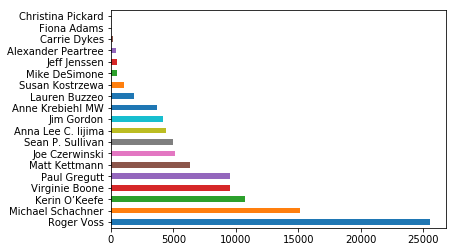

In [26]:
tasters.plot(kind='barh')
plt.show()

In [27]:
wine.groupby(['taster_name'])['points'].describe()

,count,mean,std,min,25%,50%,75%,max
taster_name,,,,,,,,
Alexander Peartree,415.0,85.855422,1.934511,80.0,85.0,86.0,87.0,91.0
Anna Lee C. Iijima,4415.0,88.415629,2.561359,80.0,87.0,88.0,90.0,98.0
Anne Krebiehl MW,3685.0,90.562551,2.373100,80.0,89.0,90.0,92.0,97.0
Carrie Dykes,139.0,86.395683,1.998618,81.0,85.0,87.0,88.0,92.0
Christina Pickard,6.0,87.833333,3.600926,82.0,87.0,88.0,89.0,93.0
Fiona Adams,27.0,86.888889,1.739437,82.0,86.0,87.0,88.0,91.0
Jeff Jenssen,491.0,88.319756,2.022727,82.0,87.0,89.0,89.0,97.0
Jim Gordon,4177.0,88.626287,2.698341,80.0,87.0,89.0,91.0,97.0
Joe Czerwinski,5147.0,88.536235,2.858701,80.0,87.0,89.0,91.0,100.0


In [28]:
wine.groupby(['country','winery']).count()

description  designation  points  price  \
country   winery                                                             
Argentina 2 Copas                            1            0       1      1   
          25 Lagunas                         1            0       1      1   
          Achaval-Ferrer                    18           13      18     18   
          Aconcagua                          3            2       3      3   
          Aconga                             5            1       5      5   
          Acordeón                           6            0       6      6   
          Adoquin                            2            0       2      2   
          Aguijón De Abeja                   4            1       4      4   
          Aitor Ider Balbo                   1            1       1      1   
          Alamos                            24            4      24     24   
          Alba Roja                          3            0       3      3   
          Alberti 154                        9            0       9      9   
          Alfredo Roca                      31           24      31     31   
          Algodon                            3            3       3      3   
          Alma Andina                        2            1       2      2   
          Alma Negra                         4            2       4      4   
          Alma de los Andes                  4            3       4      4   
          Alma del Sur                      11            9      11     11   
          Alpamanta                         10           10      10     10   
          Alpasión                           3            1       3      3   
          Alpataco                           7            3       7      6   
          Alta Vista                        39           39      39     39   
          Altamira                           2            2       2      2   
          Alto 3                             2            2       2      2   
          Altocedro                         31           31      31     31   
          Altos Las Hormigas                 9            7       9      9   
          Altos de San Isidro                1            1       1      1   
          Amadores                           2            0       2      2   
          Amalaya                            5            4       5      5   
          Ambiente                           1            0       1      1   
...                                        ...          ...     ...    ...   
US        pb                                 1            1       1      1   
          the Ghost of 413                   2            0       2      2   
          un4seen                            5            1       5      5   
          Écluse                            21           17      21     21   
          Élevée Winegrowers                 3            3       3      3   
          Órale                              1            1       1      1   
          àMaurice                          40           24      40     40   
Ukraine   Artemovsk                          2            2       2      2   
          Côtnar Hills                       3            1       3      3   
          Koblevo                            5            5       5      5   
          Marengo                            4            4       4      4   
Uruguay   Alto de la Ballena                 2            2       2      2   
          Antigua Bodega Stagnari            3            3       3      3   
          Ariano Hermanos                    3            3       3      3   
          Artesana                          10            4      10     10   
          Bodegas Carrau                     3            3       3      3   
          Bouza                             14           10      14     14   
          Bracco Bosca                       2            2       2      2   
          Castillo Viejo                     3           

In [39]:
wine['variety'].fillna(value = 'Unknown', inplace=True)

In [40]:
wine['variety'].isnull().value_counts()

False    129971
Name: variety, dtype: int64

In [45]:
wine[wine['country']]['variety'].sum()

ValueError: cannot index with vector containing NA / NaN values

In [46]:
wine['country'].isnull().value_counts()

False    129908
True         63
Name: country, dtype: int64

In [48]:
wine['country'].fillna(value = 'Unknown', inplace=True)
wine['country'].isnull().value_counts()

False    129971
Name: country, dtype: int64

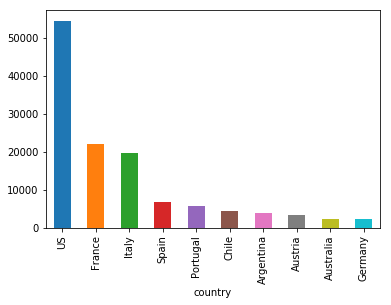

In [84]:
country_variety = wine.groupby('country')['variety'].size()
country_variety
country_variety.sort_values(ascending = False)[:10].plot.bar()
